In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
df=pd.read_csv("../input/question-pairs-dataset/questions.csv")
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df.iloc[[0]]


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


# Distribution of dataset wrt output value

0    255045
1    149306
Name: is_duplicate, dtype: int64


<AxesSubplot:xlabel='is_duplicate'>

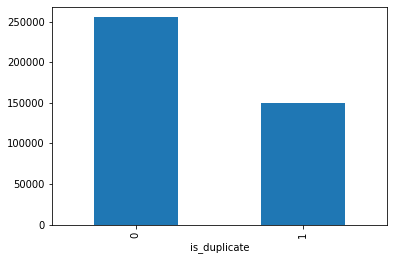

In [5]:
print(df["is_duplicate"].value_counts())
df.groupby("is_duplicate")['id'].count().plot.bar()

Total number of question pair

In [6]:
print(df.shape[0])

404351


In [7]:
a,b=df["is_duplicate"].value_counts()
print('Question pair are similar (is_duplicate=1) {}%'.format(round(100*b/(a+b),2)))
print('Question pair are not similar (is_duplicate=0) {}%'.format(round(100*a/(a+b),2)))

Question pair are similar (is_duplicate=1) 36.92%
Question pair are not similar (is_duplicate=0) 63.08%


# Total unique questions

In [8]:
q1=df['question1']
q2=df['question2']
total_quest=pd.DataFrame(q1.append(q2,ignore_index = True))
#print(total_quest)

print('Toatal number of question {}'.format(len(total_quest)))
print('Total number of unique question: {}'.format(total_quest[0].nunique()))
quest_more_than1=np.sum(total_quest.value_counts() >1)
print('Question which appeared more than one time {}'.format(quest_more_than1))
print('Max number of time a question is repeated {}'.format(max(total_quest.value_counts())))

Toatal number of question 808702
Total number of unique question: 537387
Question which appeared more than one time 111893
Max number of time a question is repeated 161


# Plot Unique vs Repeated Quest

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

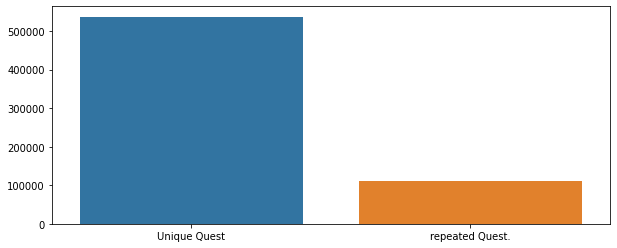

In [9]:
plt.figure(figsize=(10,4))
sns.barplot(["Unique Quest" , "repeated Quest."],[total_quest[0].nunique(),quest_more_than1])

In [10]:
df


,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1
404348,404348,789796,789797,What is one coin?,What's this coin?,0
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


# Duplicates based on 3 columns

In [11]:
pair_duplicates_based_on3_columns= df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2'], dropna=False).count().reset_index()
print(pair_duplicates_based_on3_columns[pair_duplicates_based_on3_columns['is_duplicate']>1])


          qid1    qid2  is_duplicate
207510  401038  401039             2
212238  410323  410324             2
242668  470424  470425             2


##  Checking for duplicates

In [12]:
pair_duplicates_based_on5_columns= df.groupby(['qid1','qid2','question1','question2'], dropna=False).count().reset_index()
print(pair_duplicates_based_on5_columns[pair_duplicates_based_on5_columns['is_duplicate']>1])


Empty DataFrame
Columns: [qid1, qid2, question1, question2, id, is_duplicate]
Index: []


In [13]:
df2=df[['qid1','qid2']]
print("Duplicates wrt to qid1 nd qid2 only: \n\n",df2[df2.duplicated(keep=False)])


print("\nDuplicates wrt to all cols only: \n\n",df[df[['qid1','qid2','question1','question2']].duplicated(keep=False)])

Duplicates wrt to qid1 nd qid2 only: 

           qid1    qid2
203253  401038  401039
208000  410323  410324
238815  470424  470425
297202  401038  401039
336568  470424  470425
403565  410323  410324

Duplicates wrt to all cols only: 

 Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [14]:
df.loc[df['qid1']==401038]
#qid1 and qid2 are not unique as in 
#id=203253 qid1=401038 and question1=How does it feel to be an Indian?	
#id=297202 qid1=401038 and question1=I have not been running for last 10 days, and ...

,id,qid1,qid2,question1,question2,is_duplicate
203253,203253,401038,401039,How does it feel to be an Indian?,How does it feel being an indian?,1
297202,297202,401038,401039,"I have not been running for last 10 days, and ...","I have not been running for last 10 days, and ...",1


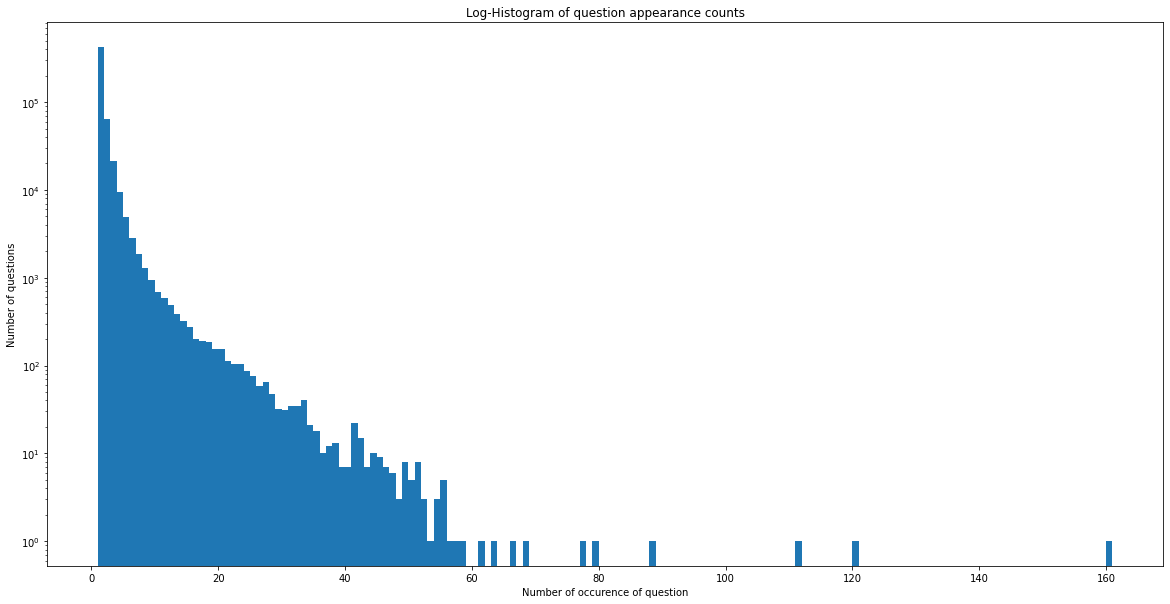

In [15]:
plt.figure(figsize=(20,10))
plt.hist(total_quest[0].value_counts(),bins=160)
plt.yscale('log')
plt.xlabel("Number of occurence of question")
plt.ylabel("Number of questions")
plt.title('Log-Histogram of question appearance counts')
plt.show()

#  Checking any NULL values

In [16]:
nan_row=df[df.isnull().values.any(1)]
print("Null values occurence \n", df.isnull().sum())
print("\nTotal Null values occurence: ", df.isnull().sum().sum())
nan_row

Null values occurence 
 id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

Total Null values occurence:  3


,id,qid1,qid2,question1,question2,is_duplicate
105796,105796,209841,209842,How can I develop android app?,NaN,0
201871,201871,398348,398349,How can I create an Android app?,NaN,0
363416,363416,711434,711435,NaN,My Chinese name is Haichao Yu. What English na...,0


In [17]:
df=df.fillna('')
print("Null values occurence \n", df.isnull().sum())
print("\nTotal Null values occurence: ", df.isnull().sum().sum())

Null values occurence 
 id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

Total Null values occurence:  0


# 3. Basic Feature Extraction  

Let us now construct a few features like:

freq_qid1 = Frequency of qid1's <br>
freq_qid2 = Frequency of qid2's <br>
q1len = Length of q1 <br>
q2len = Length of q2 <br>
q1_n_words = Number of words in Question 1 <br>
q2_n_words = Number of words in Question 2 <br>
word_Common = (Number of common unique words in Question 1 and Question 2) <br>
word_Total =(Total num of words in Question 1 + Total num of words in Question 2) <br>
word_share = (word_common)/(word_Total) <br>
freq_q1+freq_q2 = sum total of frequency of qid1 and qid2 <br>
freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2 <br>

In [18]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1']=df.groupby('qid1')['qid1'].transform('count')
    df['freq_qid2']=df.groupby('qid2')['qid2'].transform('count')
    df['q1len']=df['question1'].str.len()
    df['q2len']=df['question2'].str.len()
    df['q1_n_words']=df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words']=df['question2'].apply(lambda row: len(row.split(" ")))
    df['freq_q1+freq_q2']=df['freq_qid1']+df['freq_qid2']
    df['freq_q1-freq_q2']=df['freq_qid1']-df['freq_qid2']

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    
    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    
    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)
    df['word_share'] = df.apply(normalized_word_share, axis=1)    

In [19]:
df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

In [20]:
df

,id,qid1,qid2,question1,question2,is_duplicate,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,freq_q1+freq_q2,freq_q1-freq_q2,word_Common,word_Total,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,2,0,10.0,23.0,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,1,1,51,88,8,13,2,0,4.0,20.0,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,2,0,4.0,24.0,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,2,0,0.0,19.0,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,1,1,76,39,13,7,2,0,2.0,20.0,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404346,404346,789792,789793,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0,1,1,85,79,14,13,2,0,11.0,25.0,0.440000
404347,404347,789794,789795,Do you believe there is life after death?,Is it true that there is life after death?,1,1,1,41,42,8,9,2,0,5.0,16.0,0.312500
404348,404348,789796,789797,What is one coin?,What's this coin?,0,1,1,17,17,4,3,2,0,1.0,7.0,0.142857
404349,404349,789798,789799,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0,1,1,94,127,17,25,2,0,1.0,40.0,0.025000


# Analysis on new features

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


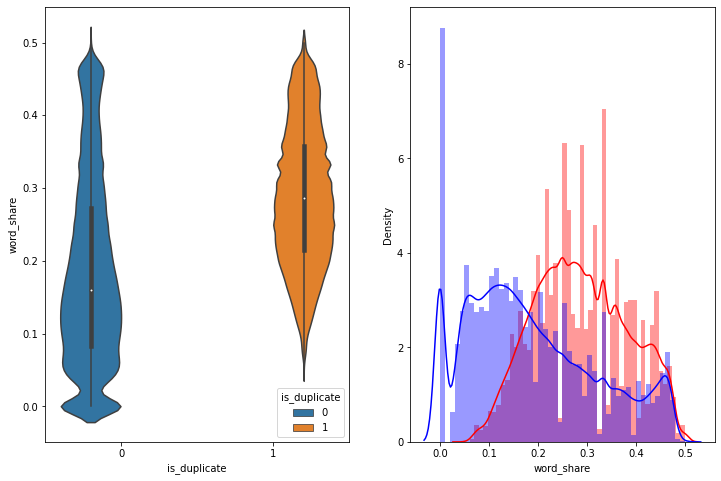

In [21]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df, hue='is_duplicate')

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:] , label = "0" , color = 'blue' )
plt.show()